In [4]:
import tensorflow as tf
import numpy as np

## 简单的TensorFlow流程

In [5]:
a = tf.constant(5,name="input_a")
b = tf.constant(3,name="input_b")
c = tf.multiply(a,b,name="mul_c")
d = tf.add(a,b,name="add_d")
e = tf.add(c,d,name="add_e")

In [6]:
##体验数据流效果执行下面代码
sess = tf.Session()
sess.run(e)

23

### 尝试添加其他节点传入

In [7]:
sess.run(c)#处处中间节点

15

run本质上是在通知tf执行所有必要的运算来求取这个__节点的输出.__

### 利用TensorBoard可视化

In [8]:
output = sess.run(e)
writer = tf.summary.FileWriter('./my_graph',sess.graph)#最新版本


> 终端中使用"tensorboard --logdir="my_graph"路径，来显示流。

### 数据流图完成后，需要关闭对象释放资源

In [9]:
#建议手动关闭
writer.close()
sess.close()

## 张量思维
张量就是n维矩阵的抽象。1D张量等价于向量，2D张量等价于矩阵，对于高维度的张量，可称为“N维张量”.

In [10]:
a = tf.constant([5,3],name="input_a")
b = tf.reduce_prod(a,name="prod_b")#接收所有分量，然后分别相乘或想加
c = tf.reduce_sum(a,name="sum_c")
d = tf.add(c,d,name="add_d")

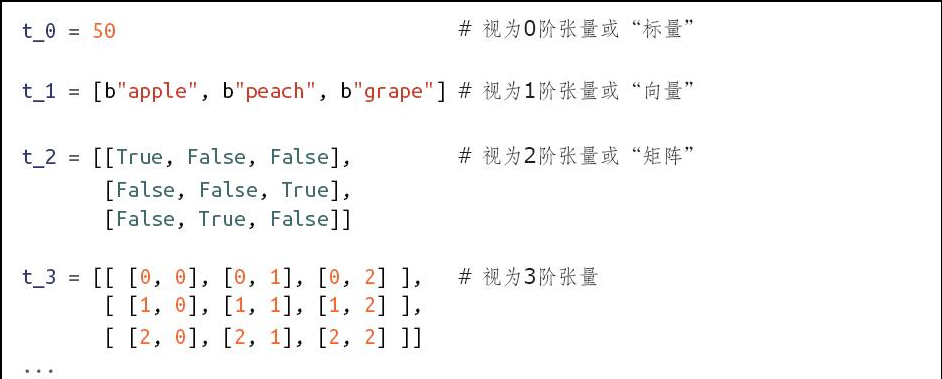

### TF的数据类型

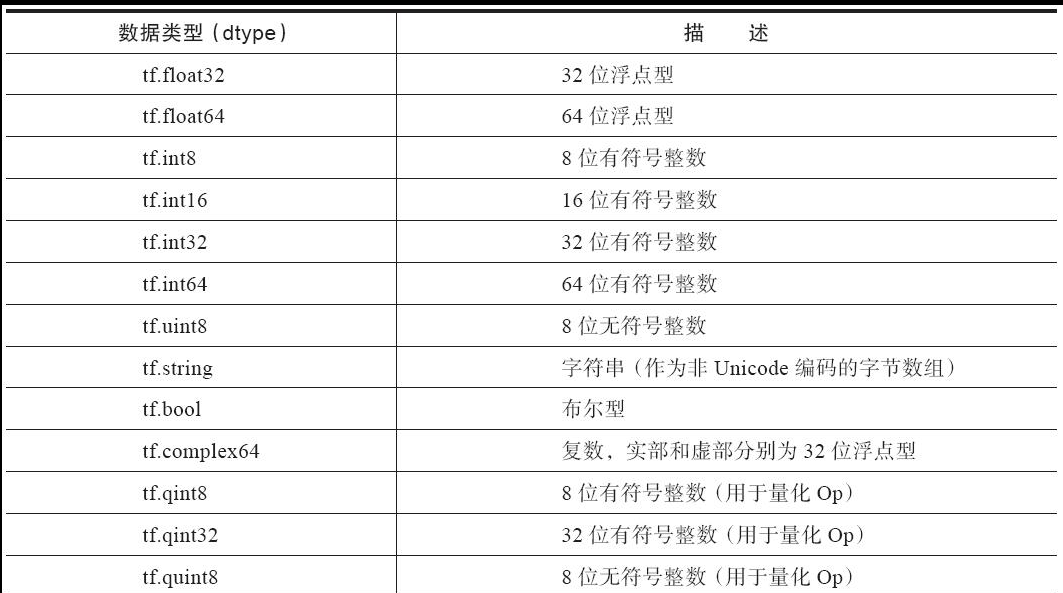

因为tf支持的类型太多，因此常借用numpy数组手工定义tf对象。

In [11]:
np.int32 == tf.int32

True

### 利用numpy创建tf

In [12]:
#元素类型为32位整数的0阶张量
t_0 = np.array(50,dtype=np.int32)

#元素为字节字符串类型的1阶张量
##注意：numpy使用字符串的时候，不要显式的指定detype类型
t_1 = np.array([b"apple",b"peach",b"grape"])
# 元素为布尔型的1阶张量
t_2 = np.array([[True,False,False],[True,False,False],[True,False,False]])
t_2

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False]], dtype=bool)

手工指定TensorFlow对象，使用__numpy__是推荐方式

In [13]:
c = tf.add(a,b,name="my_add_op")

## tf的graph对象

In [14]:
#创建数据流图
g = tf.Graph()

In [15]:
with g.as_default():
    #像往常一样创建一些op;他们将添加到Graph对象g中
    a = tf.multiply(2,3)
    

> 实际上tf被加载的时候回创建一个graph对象，并将其作为默认的数据流图。

In [16]:
# 放置在默认的数据流图中
in_default_graph = tf.add(1,2)

# 放置在数据流图g中：
with g.as_default():
    in_graph_g = tf.multiply(2,3)

#由于不在with语句中，下面的op放置在默认数据流图中
also_in_default_graph = tf.subtract(5,1)

#如果想获取默认数据流图的句柄，可以用下面
default_grap = tf.get_default_graph()

## 实战数据流图

In [17]:
g1 = tf.Graph()
g2 = tf.Graph()

with g1.as_default():
    #定义g1的op和张量
    #...
with g2.as_default():
    #定义g2的op和张量
    #...

IndentationError: expected an indented block (<ipython-input-17-e4ff5ccda342>, line 7)

In [18]:

# 创建OP、Tensor对象（使用默认数据流图）
a = tf.add(2,5)
b = tf.multiply(a,3)

#利用默认数据流图启动session对象
sess = tf.Session()

#以下方法等价，多个graph需要显式设置参数
# sess = tf.Session()
# sess = tf.Session(graph=tf.get_default_graph())

In [19]:
#计算
sess.run(b)

21

In [20]:
sess.run([a,b]) #传入多个节点，计算多个值

[7, 21]

##  变量

In [21]:
# 为variable对象传入一个初始值3
my_var = tf.Variable(3,name="my_variable")
add = tf.add(5,my_var)
mul = tf.multiply(8,my_var)

In [22]:
# 2x2的零矩阵
zeros = tf.zeros([2,2])
zeros

<tf.Tensor 'zeros:0' shape=(2, 2) dtype=float32>

In [23]:
#长度为6的全1向量
ones = tf.ones([6])
ones

<tf.Tensor 'ones:0' shape=(6,) dtype=float32>

In [24]:
#3X3X3的张量，其元素服从0~10的均匀分布
uniform = tf.random_uniform([3,3,3],minval=0,maxval=10)
uniform

<tf.Tensor 'random_uniform:0' shape=(3, 3, 3) dtype=float32>

In [25]:
#3X3X3的张量，其元素服从0均值，标准差为2的正态分布
normal = tf.random_normal([3,3,3],mean=0.0,stddev=2.0)
normal

<tf.Tensor 'random_normal:0' shape=(3, 3, 3) dtype=float32>

In [26]:
#tensor对象不回返回任何小于3.0或大于7.0的值
trunc = tf.truncated_normal([2,2],mean=5.0,stddev=1.0)

In [27]:
#默认均值为0，默认标准差为1.0
random_var = tf.Variable(tf.truncated_normal([2,2]))

## 变量初始化

In [28]:
#利用默认数据流图启动session对象
sess = tf.Session()

uniform = tf.random_uniform([3,3,3],minval=0,maxval=10)
normal = tf.random_normal([3,3,3],mean=0.0,stddev=2.0)
random_var = tf.Variable(tf.truncated_normal([2,2]))

init = tf.global_variables_initializer() #调用全局初始化替代initializer
sess.run(init)
sess.close()

## Variable对象的修改

In [59]:
var1 = tf.Variable(0,name="initialie_me")
var2 = tf.Variable(1,name="no_initialization")

init = tf.variables_initializer([var1],name="init_var1")#尼玛又移除
sess = tf.Session()
sess.run(init)


### 修改对象的值

In [60]:
#创建一个初值为1的varable对象
my_var = tf.Variable(1)

#创建一个op,使其在每次运行的时候*2
my_var_times_two = my_var.assign(my_var * 2)

#初始化一个op
init = tf.global_variables_initializer()

#启动会话
sess = tf.Session()

#初始化variable对象
sess.run(init)

In [61]:
#将variable对象*2，并返回
sess.run(my_var_times_two)

2

In [62]:
#再次相乘
sess.run(my_var_times_two)

4

In [63]:
#再次相乘
sess.run(my_var_times_two)

8

### 自增自减变量

In [64]:
sess.run(my_var.assign_sub(1))#自增1

7

In [65]:
sess.run(my_var.assign_sub(1))#自减

sess.close()

## 多个session 维护多个变量

In [67]:
my_var = tf.Variable(0)
init = tf.initialize_all_variables()


#启动多个session
sess1 = tf.Session()
sess2 = tf.Session()

#sess1
sess1.run(init)
sess1.run(my_var.assign_add(5))

5

In [68]:
#sess2
sess2.run(init)
sess2.run(my_var.assign_add(2))

2

In [73]:
##不同session下输出
print (sess1.run(my_var.assign_add(5)))
print (sess2.run(my_var.assign_add(2)))

sess1.close()
sess2.close()

25
10


- 如果希望将所有的Variable对象的值重置为__初始值__，需要调用tf.initialize_all_variables()
- 如果只对部分的Variable对象重新初始化，调用tf.initialize_variables()

> trainable参数可以设置在机器学习模型中是否能够自动修改变量的值

In [74]:
#创建op
my_var = tf.Variable(0)
init = tf.global_variables_initializer()

#启动sess
sess=  tf.Session()

#初始化
sess.run(init)

#修改variable对象的值
sess.run(my_var.assign(10))

10

In [77]:
#重置0
sess.run(init)
sess.run(my_var)

0

In [79]:
no_trainable = tf.Variable(0,trainable=False) #不允许学习模型自动修改值，设置成false